*First compiled: September 18, 2017.*

# Robustness of graph abstraction for [Paul *et al.*, Cell (2015)](https://doi.org/10.1016/j.cell.2015.11.013)

Here, we investigate the robustness of the results in [*paul15*](paul15.ipynb).

In [1]:
import numpy as np
import matplotlib.pyplot as pl
from matplotlib import rcParams
import scanpy.api as sc
from collections import OrderedDict
import pandas as pd
import seaborn as sns

sc.settings.verbosity = 1                # amount of output
sc.settings.set_figure_params(dpi=80)    # low pixel number yields small inline figures
sc.logging.print_versions()

scanpy==1.0.4+63.gef4d1c0.dirty anndata==0.6+13.g49bf31b numpy==1.13.1 scipy==1.0.0 pandas==0.22.0 scikit-learn==0.19.1 statsmodels==0.8.0 python-igraph==0.7.1 louvain==0.6.1 


In [2]:
adata = sc.read('paul15')
sc.pp.neighbors(adata, n_neighbors=4)
sc.tl.louvain(adata, resolution=1.2)
sc.tl.paga(adata)
adata_reference = adata.copy()

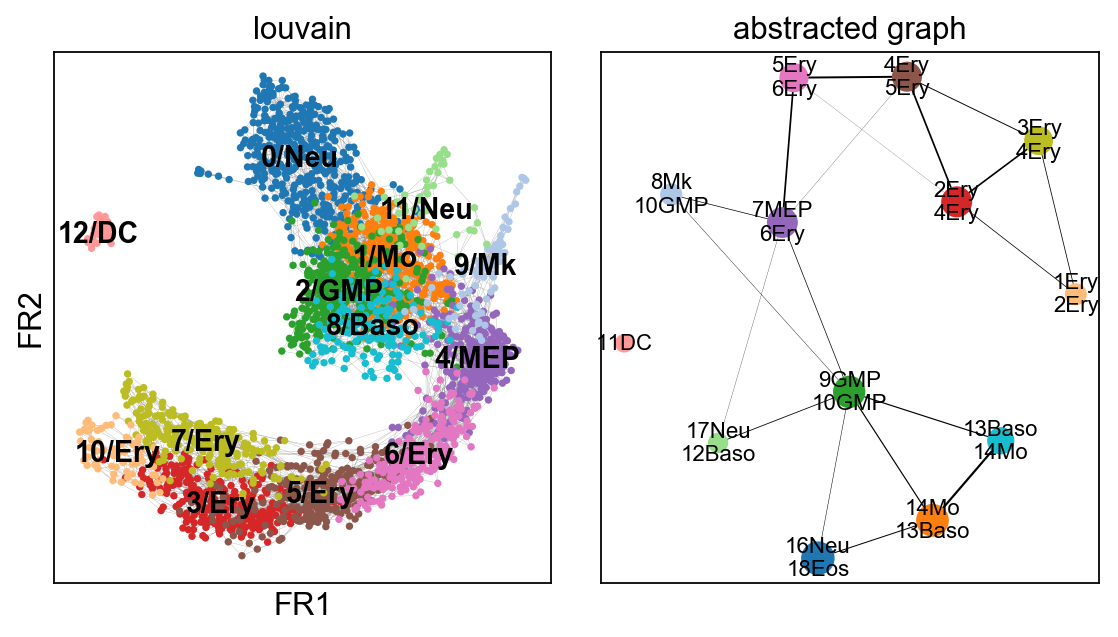

In [16]:
asso_names, asso_matrix = sc.utils.compute_association_matrix_of_groups(
    adata_reference, prediction='louvain', reference='paul15_clusters', normalization='reference')
asso_colors = sc.utils.get_associated_colors_of_groups(sc.pl.palettes.default_26, asso_matrix)
sc.pl.paga_compare(
    adata_reference, color='louvain', basis='draw_graph_fr', title_graph='abstracted graph',
    palette=sc.pl.palettes.default_26,
    layout='fr',
    groups_graph=asso_names, # color_graph=asso_colors, 
    fontsize=10)

## Removing the lymphoid cells as done by [Qiu *et al.*, Nat. Meth. (2017)](https://doi.org/10.1038/nmeth.4402)

In [4]:
adata = adata[~(adata.obs['paul15_clusters'] == '19Lymph')]

Rerun the analysis.

In [5]:
sc.pp.neighbors(adata, n_neighbors=4)
sc.tl.louvain(adata, resolution=1.2)
sc.tl.paga(adata)

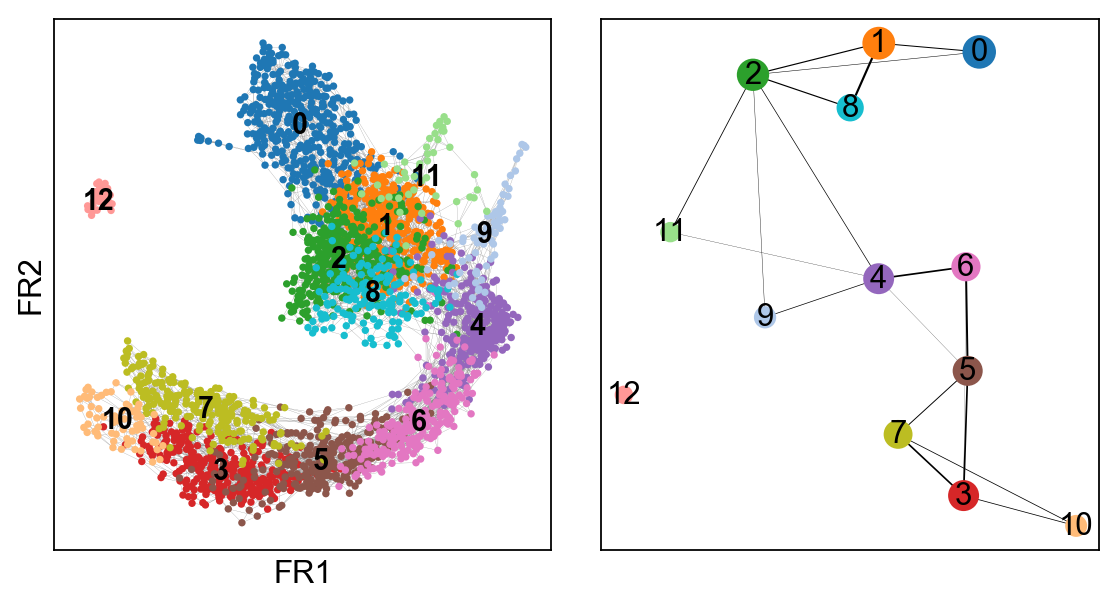

In [7]:
sc.pl.paga_compare(adata, root=10, basis='draw_graph_fr',
           color='louvain', title='')

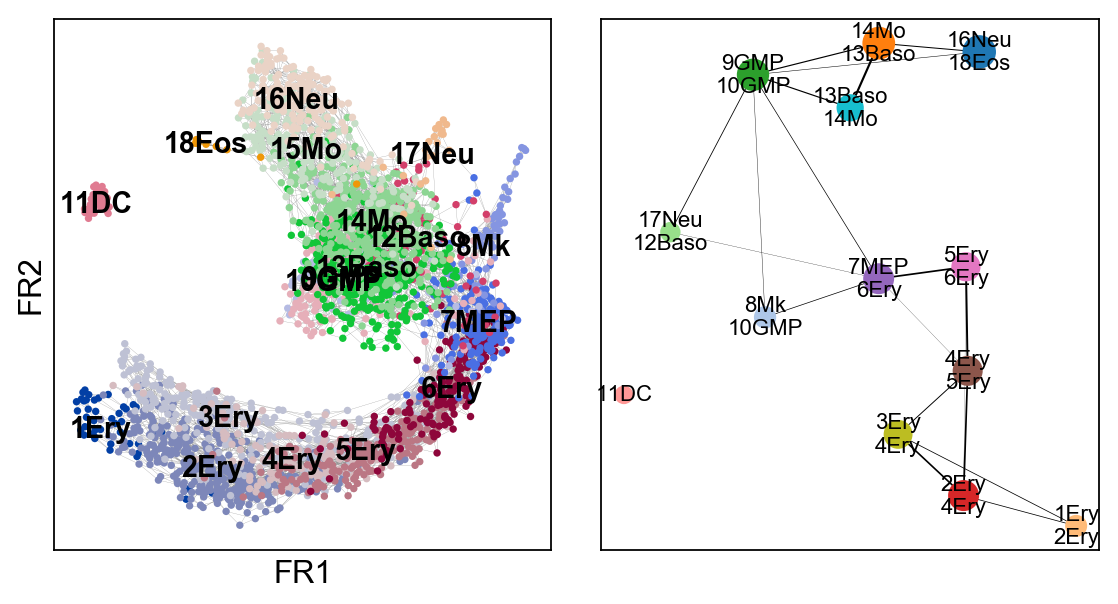

In [9]:
asso_names, asso_matrix = sc.utils.compute_association_matrix_of_groups(
    adata, prediction='louvain', reference='paul15_clusters', normalization='reference')
asso_colors = sc.utils.get_associated_colors_of_groups(sc.pl.palettes.default_26, asso_matrix)
axs = sc.pl.paga_compare(adata, color='louvain', basis='draw_graph_fr', title='', palette=sc.pl.palettes.default_26,
                 root=10,
                 groups_graph=asso_names,
                 fontsize=10)

In [11]:
import re
asso_names, _ = sc.utils.compute_association_matrix_of_groups(
    adata, prediction='louvain', reference='paul15_clusters', normalization='reference', max_n_names=1)
adata.obs['louvain'].cat.categories =[
    '{}/{}'.format(name, re.sub('\d+', '', asso_names[iname])) # replace integers
    for iname, name in enumerate(adata.obs['louvain'].cat.categories)]

<input>:5: DeprecationWarning: invalid escape sequence \d
<input>:5: DeprecationWarning: invalid escape sequence \d
<input>:5: DeprecationWarning: invalid escape sequence \d
<ipython-input-11-6dadffc76060>:5: DeprecationWarning: invalid escape sequence \d
  '{}/{}'.format(name, re.sub('\d+', '', asso_names[iname])) # replace integers


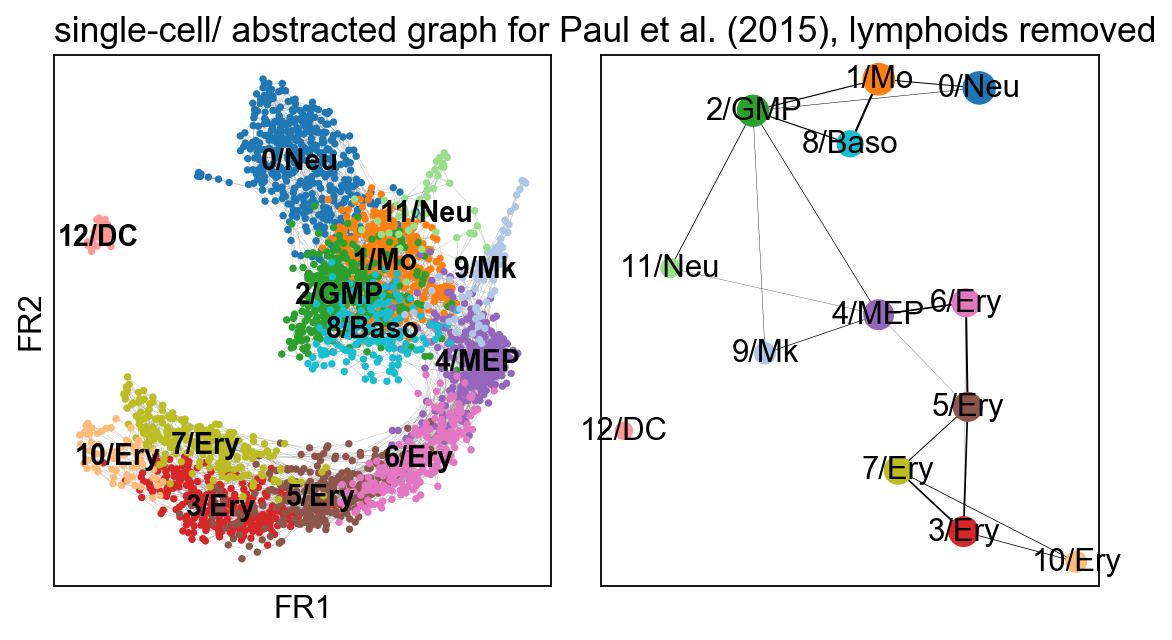

In [14]:
axs = sc.pl.paga_compare(adata,
    title='',
    color='louvain',
    basis='draw_graph_fr',
    show=False)
axs[0].set_title('single-cell/ abstracted graph for Paul et al. (2015), lymphoids removed', loc='left', fontsize=16)
pl.savefig('./figures/paga_without_lymphoids.pdf', dpi=300)
pl.show()

## Choose different resolutions for the Louvain clustering

Consider the full dataset again.

Choose a very low resolution.

In [22]:
adata = sc.read('paul15')
sc.pp.neighbors(adata, n_neighbors=4)
sc.tl.louvain(adata, resolution=0.5)
sc.tl.paga(adata)

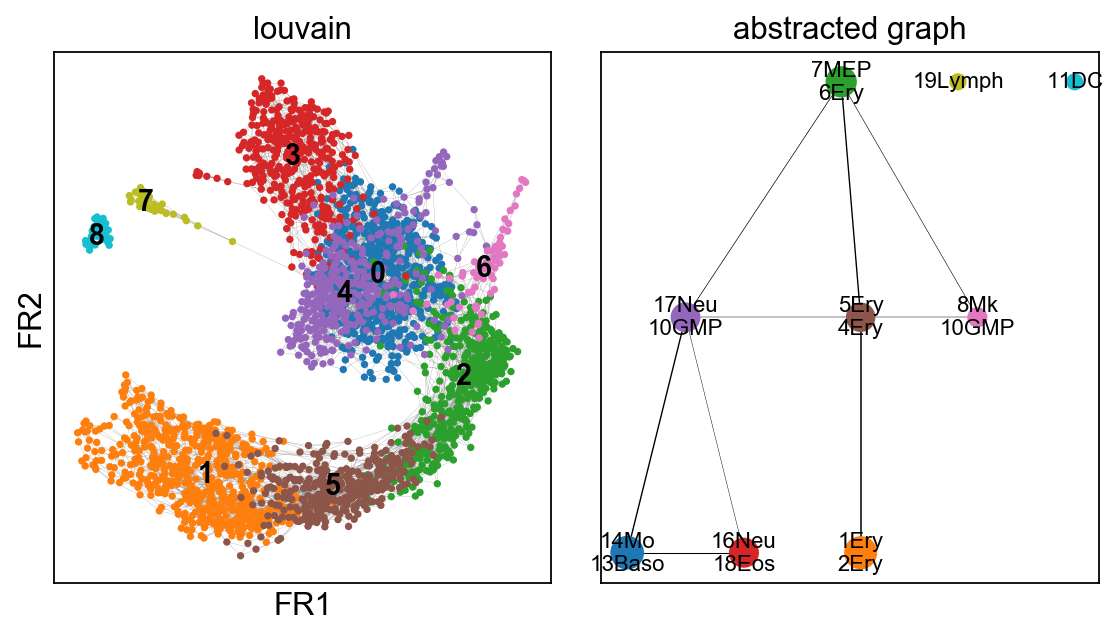

In [46]:
asso_names, asso_matrix = sc.utils.compute_association_matrix_of_groups(
    adata, prediction='louvain', reference='paul15_clusters', normalization='reference')
sc.pl.paga_compare(
    adata, color='louvain', basis='draw_graph_fr',
    layout='rt', root=[2, 7, 8],
    groups_graph=asso_names,
    fontsize=10)

Compare the agreement of the topology with the reference graph.

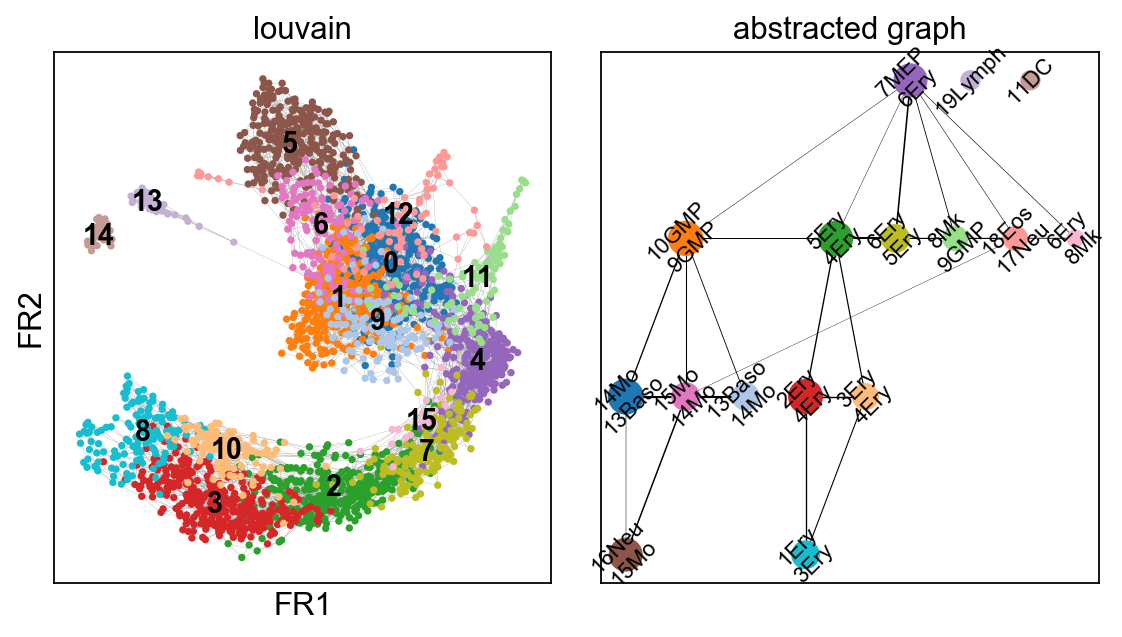

In [42]:
asso_names, asso_matrix = sc.utils.compute_association_matrix_of_groups(
    adata_reference, prediction='louvain', reference='paul15_clusters', normalization='reference')
asso_colors = sc.utils.get_associated_colors_of_groups(sc.pl.palettes.default_26, asso_matrix)
sc.pl.paga_compare(
    adata_reference, color='louvain', basis='draw_graph_fr', groups_graph=asso_names, layout='rt', root=[4, 13, 14],
    fontsize=10, text_kwds={'rotation': 45})

Comparing both trees by eye, one would say that they agree very well.

A sample logging output of the following code snippet, which quantifies the agreement, is 
```
leaf nodes in graph 1: ['1', '2', '3', '4', '7', '9', '11', '13']
compare shortest paths between leafs (12, 15) in graph1 and (6, 5) in graph2:
      path1 = ['12', '1', '0', '15'],
path_mapped = [['6', '1'], ['1', '3', '5'], ['5', '1'], ['5', '1']],
      path2 = ['6', '1', '5'],
-> n_agreeing_steps = 2 / n_steps = 2.
```

In [47]:
# sc.settings.verbosity = 5
result = sc.tl.paga_compare_paths(adata_reference, adata, adjacency_key='confidence_tree')
print(result)

paga_compare_paths_result(frac_steps=1.0, n_steps=73, frac_paths=1.0, n_paths=28)


Choose a super high resolution.

In [48]:
sc.pp.neighbors(adata, n_neighbors=4)
sc.tl.louvain(adata, resolution=2)
sc.tl.paga(adata)

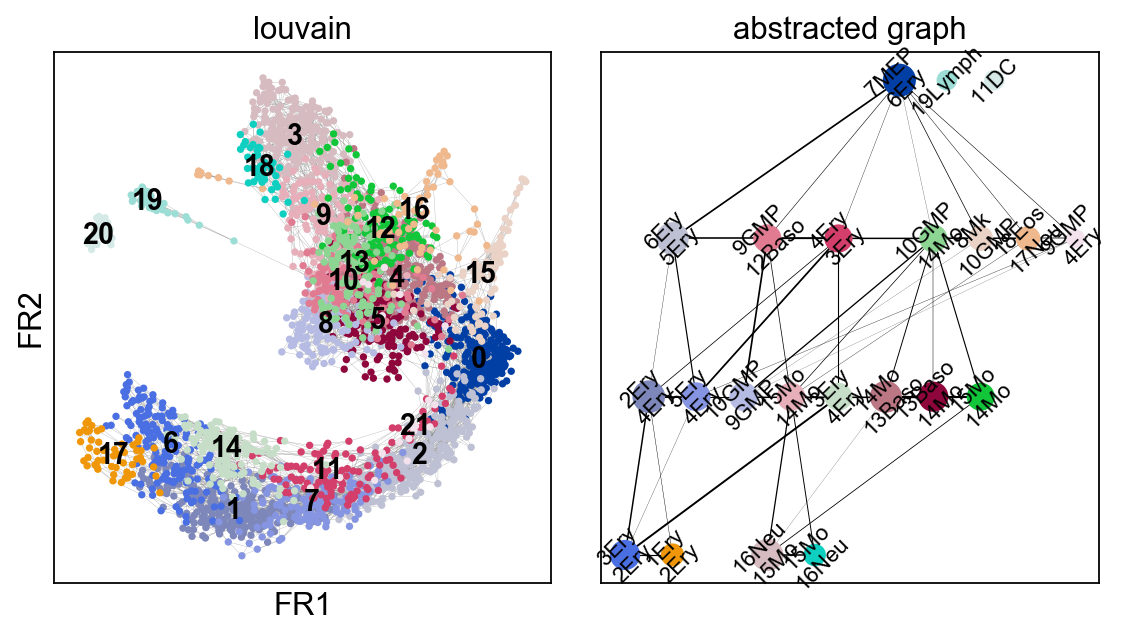

In [51]:
asso_names, asso_matrix = sc.utils.compute_association_matrix_of_groups(
    adata, prediction='louvain', reference='paul15_clusters', normalization='reference')
sc.pl.paga_compare(
    adata, color='louvain', basis='draw_graph_fr',
    layout='rt', root=[0, 19, 20],
    groups_graph=asso_names,
    fontsize=10, text_kwds={'rotation': 45})

In [52]:
result = sc.tl.paga_compare_paths(adata_reference, adata,
                                  adjacency_key='confidence_tree')
print(result)

paga_compare_paths_result(frac_steps=0.9453125, n_steps=128, frac_paths=0.75, n_paths=28)


## Sample over different input parameters

Here, we sample over many different input parameters.

In [14]:
sc.settings.verbosity = 1
statistics = OrderedDict([('nr. neighbors single-cell graph' , []), ('resolution louvain', []),
                          ('nr. louvain groups', []), ('total nr. steps in paths', []),
                          ('fraction of correct steps', []), ('fraction of correct paths', [])])
np.random.seed(0)
for i in range(100):
    n_neighbors = np.random.randint(3, 20)
    resolution = np.random.rand() * 3
    adata_new = sc.tl.paga(adata_reference, n_neighbors=n_neighbors, resolution=resolution, copy=True, recompute_graph=True)
    result = sc.tl.paga_compare_paths(adata_reference, adata_new, adjacency_key='paga_adjacency_tree_confidence')
    # uncomment for visualization or output
    # axs = sc.pl.paga(adata_new, basis='draw_graph_fr', layout='fr')
    # print('n_neighbors' , n_neighbors, 'resolution', resolution,
    #       'n_groups', len(adata_new.add['paga_groups_order']), 'frac_steps', result.frac_steps)
    statistics['nr. neighbors single-cell graph' ].append(n_neighbors)
    statistics['resolution louvain'].append(resolution)
    statistics['nr. louvain groups'].append(len(adata_new.add['paga_groups_order']))
    statistics['total nr. steps in paths'].append(result.n_steps)        
    statistics['fraction of correct steps'].append(result.frac_steps)
    statistics['fraction of correct paths'].append(result.frac_paths)

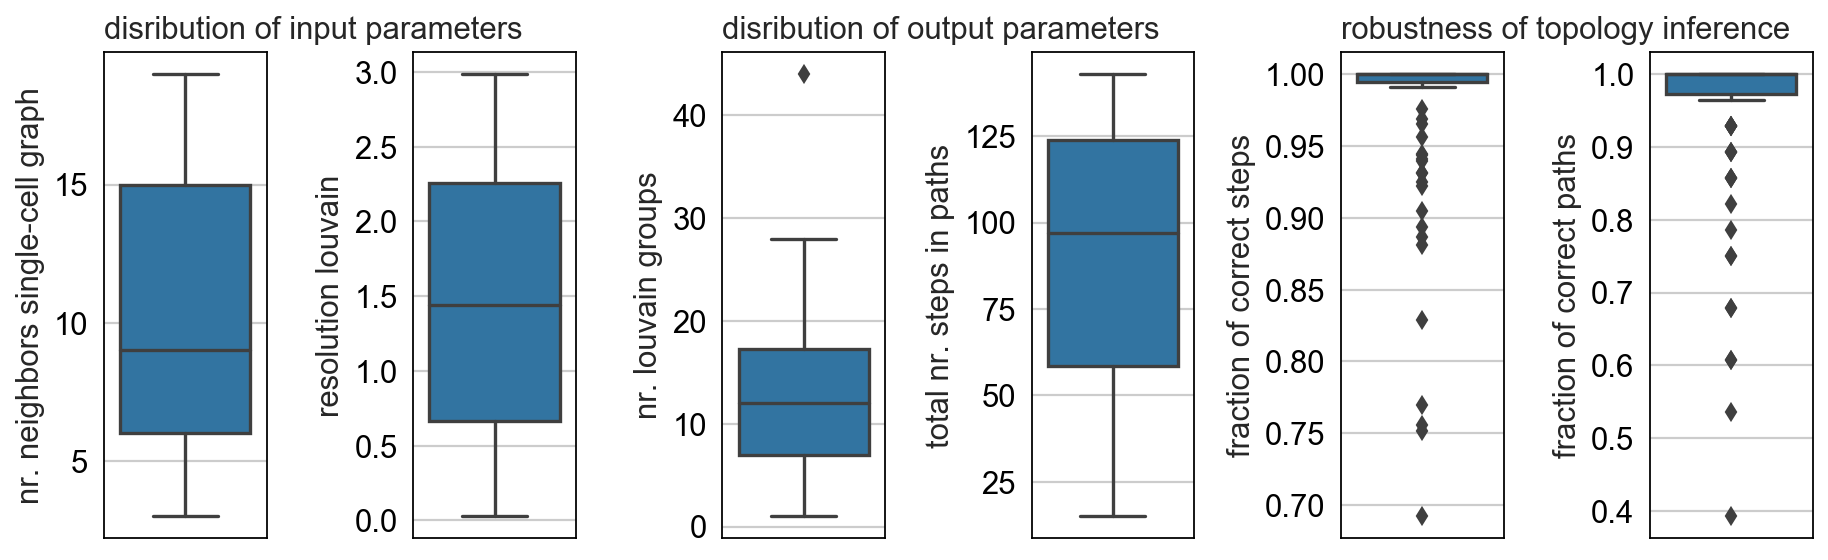

In [16]:
df = pd.DataFrame(statistics)
_, ax = pl.subplots(ncols=df.shape[1], figsize=(12, 4), gridspec_kw={'left': 0.07, 'wspace': 0.9})
for i, col in enumerate(df.columns):
    sns.boxplot(df[col], ax=ax[i], orient='vertical')
ax[0].set_title('distribution of input parameters', loc='left')
ax[2].set_title('distribution of output parameters', loc='left')
ax[4].set_title('robustness of topology inference', loc='left')
pl.savefig('./figures/robustness_summary.png', dpi=300)
pl.show()